# FOOTBALL GAME ANALYSIS 1
## ITALY VS ENGLAND
## DATA VISUALIZATION PROJECT
### BY
### * ARKARAJ GHOSH 19BCE2418
### * PRATYAY PIYUSH 19BCE2364
### * SAUMITRA PATHAK 19BCE2411
### * SHIVAM BANSAL 19BCE0930

In [1]:
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import OffsetImage
import squarify
from functools import reduce
sns.set_style('white')

In [2]:
#defining a function to draw the football pitch
def draw_pitch(ax):
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")
     #Left wing Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")
     #Right wing Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")
     #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")
     #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")
     #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
     #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
     #Preparing Arcs
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
     #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

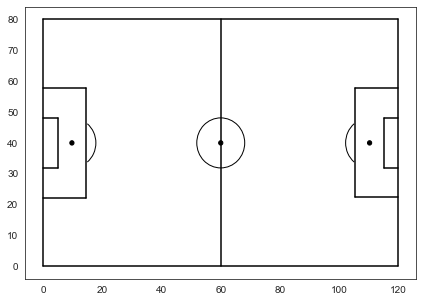

In [3]:
#using the above function to plot the football field.
fig=plt.figure() #create a figure object for plotting purpose
fig.set_size_inches(7, 5) #specify the width and height.
ax=fig.add_subplot(1,1,1) #to draw a 1x1 plot at position 1.
draw_pitch(ax) #pass the ax object as a paramter in the above function
plt.show() #display the plot (football field)

In [4]:
with open('data/ita_eng_events.json', 'r', errors="ignore",  encoding='utf8') as data_file:
    data = json.load(data_file)
df = pd.json_normalize(data, sep='_')

In [5]:
df

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,foul_committed_offensive,pass_miscommunication,shot_saved_off_target,goalkeeper_shot_saved_off_target,shot_saved_to_post,goalkeeper_shot_saved_to_post,shot_open_goal,pass_cut_back,injury_stoppage_in_chain,goalkeeper_penalty_saved_to_post
0,0a58f547-aa52-4d0f-82a7-eda2a2794016,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a547024f-9000-4dc5-866b-fbd88b137810,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4c072ece-eef4-4201-a446-4d5cd8aa5d96,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c0dd5679-16c3-4b99-8f04-fae3a74f0f83,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0aee931f-9614-4879-b3e8-fd9d7cc80c59,5,1,00:00:00.286,0,0,2,0.663637,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,1cb02283-e738-4294-99bc-531d265dddac,4792,5,00:06:57.938,126,57,221,0.000000,23,Goal Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4792,572d5967-c7c5-4d86-ab60-c0b841a63a4a,4793,5,00:07:43.973,127,43,222,0.306645,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4793,1d5fcee1-160c-4f09-ab7f-8fee44f31e9a,4794,5,00:07:44.279,127,44,222,0.000000,23,Goal Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4794,b460f032-74e5-449d-b3da-eec37aa87495,4795,5,00:07:45.767,127,45,222,0.000000,34,Half End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas

In [7]:
df['player_name'].value_counts()

Marco Verratti                 382
Leonardo Bonucci               373
Jorge Luiz Frello Filho        347
Giorgio Chiellini              326
Giovanni Di Lorenzo            252
Lorenzo Insigne                237
Emerson Palmieri dos Santos    218
Luke Shaw                      199
Kalvin Phillips                198
Harry Maguire                  191
John Stones                    164
Harry Kane                     161
Nicolò Barella                 146
Kyle Walker                    136
Federico Chiesa                133
Declan Rice                    128
Mason Mount                    125
Raheem Sterling                119
Bryan Cristante                118
Jordan Pickford                115
Gianluigi Donnarumma            96
Kieran Trippier                 86
Bukayo Saka                     85
Ciro Immobile                   85
Domenico Berardi                85
Jordan Brian Henderson          62
Federico Bernardeschi           62
Manuel Locatelli                44
Andrea Belotti      

In [8]:
df['type_name'].value_counts()

Pass                 1350
Ball Receipt*        1317
Carry                1106
Pressure              370
Ball Recovery          93
Duel                   92
Dribble                51
Foul Committed         47
Goal Keeper            42
Foul Won               42
Clearance              39
Interception           35
Shot                   35
Block                  35
Dribbled Past          34
Miscontrol             28
Dispossessed           27
Substitution           11
Half Start             10
Half End               10
Tactical Shift          7
Injury Stoppage         5
Player Off              3
Player On               3
Starting XI             2
Referee Ball-Drop       2
Name: type_name, dtype: int64

In [9]:
df = pandas.json_normalize(data, sep = "_")
marco_pass = df[(df['type_name'] == "Pass") & (df['player_name']=='Marco Verratti')]
pass_column = [i for i in df.columns if i.startswith("pass")]
marco_pass = marco_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]] 
marco_pass.head()

,id,period,timestamp,location,pass_end_location,pass_recipient_name
7,9440989a-b1a0-4142-9907-1c9e69559ac7,1,00:00:02.177,"[48.0, 35.7]","[39.0, 70.7]",Giovanni Di Lorenzo
95,bceb76c8-38d1-4915-9cba-8a429806d082,1,00:03:37.394,"[44.7, 18.6]","[37.5, 28.9]",Jorge Luiz Frello Filho
141,e499fa19-48c3-4b7c-9b43-3119108b1b4f,1,00:05:09.328,"[29.6, 48.1]","[40.4, 72.9]",Giovanni Di Lorenzo
149,00c73bf4-6bd6-4176-b3e0-aa311dfb593d,1,00:05:18.295,"[48.9, 69.8]","[36.0, 44.1]",Leonardo Bonucci
156,7ee1f161-3fa5-493b-abee-943602c64e0a,1,00:05:23.394,"[48.3, 52.2]","[54.3, 40.0]",Jorge Luiz Frello Filho


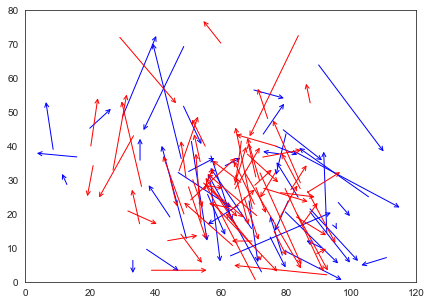

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0, 120])
ax.set_ylim([0, 80])
for i in range(len(marco_pass)):
    color = "blue" if marco_pass.iloc[i]['period'] == 1 else "red" #if the pass by the player is successful then mark arrow with blue else red
    ax.annotate("", 
                xy = (marco_pass.iloc[i]['pass_end_location'][0], 
                marco_pass.iloc[i]['pass_end_location'][1]), 
                xycoords = 'data',
                xytext = (marco_pass.iloc[i]['location'][0], 
                marco_pass.iloc[i]['location'][1]), 
                textcoords = 'data',
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3", 
                color = color),) 
plt.show()


In [11]:
#store the information of a specific player into a variable called sergio_action.
kalvin_action = df[(df['player_name']=='Kalvin Phillips')][["id", "type_name","period", "timestamp", "location"]] 
kalvin_action.head() 

,id,type_name,period,timestamp,location
28,66a5a4e6-0bdf-4637-ad7e-84c109c2ecf6,Ball Receipt*,1,00:00:20.875,"[68.2, 67.4]"
29,e776941e-7b70-4017-8b86-a7b3b235dff5,Carry,1,00:00:20.875,"[68.2, 67.4]"
31,3a0dfdbe-7e9b-4711-a947-04db0300347b,Pass,1,00:00:22.058,"[68.2, 66.5]"
80,6e875139-9b92-4f83-aab5-7380494eb107,Pressure,1,00:03:27.285,"[41.6, 21.2]"
96,62be7b57-bd31-4241-a838-c85e78ff3b93,Pressure,1,00:03:38.661,"[79.2, 53.0]"


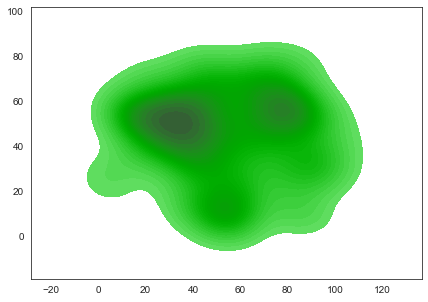

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
x_coord = [i[0] for i in kalvin_action["location"]] #collect the x coordinates of the specified player in variable x_coord
y_coord = [i[1] for i in kalvin_action["location"]] #collect the y coordinates of the specified player in variable y_coord
#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks. It is used to remove the contour lines.
sns.kdeplot(x=x_coord, y=y_coord, shade = "True", color = "green", n_levels = 30) 
plt.show()

In [13]:
#defining a function to show heat map of a particular player
def heat_pass_map(data, player_name):
    pass_data = data[(data['type_name'] == "Pass") & (data['player_name'] == player_name)]
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')
    count1 = 0
    count2 = 0
    for i in range(len(pass_data)):
        color = "blue" if pass_data.iloc[i]['period'] == 1 else "red" #if the pass by the player is successful then mark arrow with blue else red
        if(color=="blue"):
            count1 += 1
        else:
            count2 += 1
        ax.annotate("", 
                    xy = (pass_data.iloc[i]['pass_end_location'][0], 
                    pass_data.iloc[i]['pass_end_location'][1]), 
                    xycoords = 'data',
                    xytext = (pass_data.iloc[i]['location'][0], 
                    pass_data.iloc[i]['location'][1]), 
                    textcoords = 'data',
                    arrowprops=dict(arrowstyle="->",connectionstyle="arc3", 
                    color = color),)
    kalvin_action = df[(df['player_name']==player_name)][["id", "type_name","period", "timestamp", "location"]] 
    df_special = pd.DataFrame(kalvin_action['location'])
    df_special.dropna(inplace=True)
    new_action = df_special.to_numpy()
    x_coord = []
    y_coord = []
    for i in new_action:
        x_coord.append(i[0][0])
        y_coord.append(i[0][1])
    sns.kdeplot(x=x_coord, y=y_coord, shade = "True", color = "green", n_levels = 30)
    
    pass_acc = (count2/(count1+count2))*100
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.title(f"{player_name} HeatMap and Passes had Pass Accuracy of {round(pass_acc, 2)}%")
    plt.show()

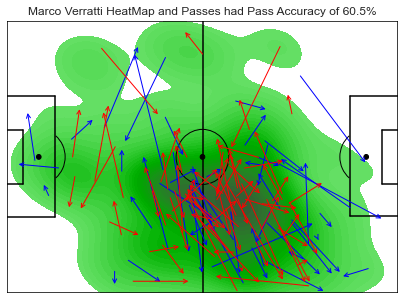

In [14]:
heat_pass_map(df, 'Marco Verratti')

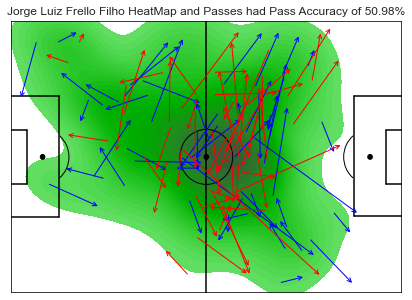

In [15]:
heat_pass_map(df, 'Jorge Luiz Frello Filho')

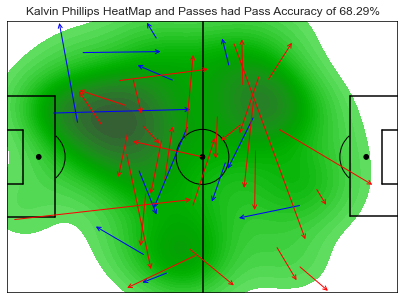

In [16]:
heat_pass_map(df, 'Kalvin Phillips')

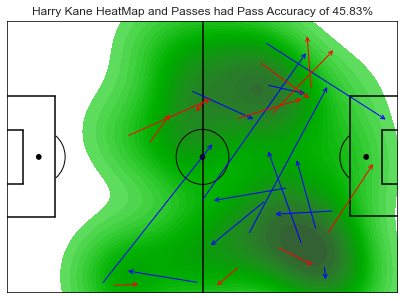

In [17]:
heat_pass_map(df, 'Harry Kane')

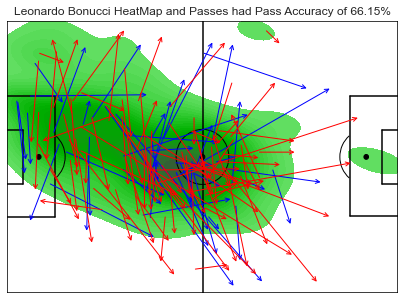

In [18]:
heat_pass_map(df, 'Leonardo Bonucci')